#  Bike Sharing Demand Classification – ML project


## Problem Statement


The goal of this project is to classify the total bike rental count into discrete classes based on historical and contextual data such as weather, temperature, hour of the day, season, and working day status.

I converted the continuous target variable count into three balanced classes:

- Class 0: Low demand
- Class 1: Medium demand
- Class 2: High demand
- `cnt_class` — Categorical label for bike demand:
  - `Low` (Count ≤ 100)
  - `Medium` (100 < Count ≤ 300)
  - `High` (Count > 300)


This classification helps stakeholders:

- Anticipate demand levels for better fleet distribution.
- Prevent underutilization or unavailability of bikes.
- Improve resource planning for peak and off-peak hours.

## Dataset Overview


The dataset used comes from the UCI Bike Sharing Dataset https://archive.ics.uci.edu/dataset/275/bike+sharing+dataset with the following key features:

Temporal Features: hr, weekday, mnth, yr, season, workingday

Weather Features: temp, atemp, hum, windspeed, weathersit

Target Class: cnt_class (0 = Low, 1 = Medium, 2 = High demand)

###  Original Features

| Feature        | Type      | Description |
|----------------|-----------|-------------|
| `instant`      | Integer   | Record index |
| `date`         | Date      | Date in `yyyy-mm-dd` |
| `season`       | Categorical (1-4) | 1: Spring, 2: Summer, 3: Fall, 4: Winter |
| `yr`           | Binary (0/1) | 0: 2011, 1: 2012 |
| `mnth`         | Integer (1-12) | Month |
| `hr`           | Integer (0-23) | Hour of the day |
| `holiday`      | Binary (0/1) | Whether the day is a holiday |
| `weekday`      | Integer (0-6) | Day of the week |
 | `workingday`   | Binary (0/1) | 1 if working day, 0 otherwise |
| `weathersit`   | Categorical (1-4) | 1: Clear, 2: Mist, 3: Light Snow/Rain, 4: Heavy Rain |
| `temp`         | Float     | Normalized temperature (0 to 1) |
| `atemp`        | Float     | Normalized "feels like" temperature |
| `hum`          | Float     | Normalized humidity |
| `windspeed`    | Float     | Normalized wind speed |
| `casual`       | Integer   | Count of casual users |
| `registered`   | Integer   | Count of registered users |
| `count`        | Integer   | Total bike rentals (target for regression) |


Redundant or information-leaking columns (casual, registered, count) were dropped during preprocessing.

# IMPORTING ALL ESSENTIAL LIBRARIES

In [1]:
#importing all essential libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from imblearn.over_sampling import SMOTE
from sklearn.feature_selection import SelectKBest,f_classif       
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import precision_score, f1_score, recall_score
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
import joblib

# READING DATASET AS DF1

In [2]:
data=pd.read_csv("hour.csv")   #reading csv file as data
data

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,17375,2012-12-31,1,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,11,108,119
17375,17376,2012-12-31,1,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,8,81,89
17376,17377,2012-12-31,1,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,7,83,90
17377,17378,2012-12-31,1,1,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343,13,48,61


# CONVERTING DATA AS DATAFRAME DF

In [3]:
df=pd.DataFrame(data)  #converting data into dataframe
df

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,17375,2012-12-31,1,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,11,108,119
17375,17376,2012-12-31,1,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,8,81,89
17376,17377,2012-12-31,1,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,7,83,90
17377,17378,2012-12-31,1,1,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343,13,48,61


# DESCRIPTIVE ANALYSIS

In [4]:
df.head(2)  #first 2 entries of dataframe

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40


In [5]:
df.tail(2) #last 2 entries of dataframe

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
17377,17378,2012-12-31,1,1,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343,13,48,61
17378,17379,2012-12-31,1,1,12,23,0,1,1,1,0.26,0.2727,0.65,0.1343,12,37,49


In [6]:
df.shape #provides total no.of rows and columns in the df

(17379, 17)

In [7]:
df.size

295443

In [8]:
df.columns   #all columns names in dataframe

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'hr', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [9]:
df.info()    #provides all infomation about a dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [10]:
df.describe()   #provides statistical measures of every numerical columns 

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


In [11]:
df.dtypes        #provides the data type of all columns

instant         int64
dteday         object
season          int64
yr              int64
mnth            int64
hr              int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object

# DATA CLEANING

In [12]:
df.isnull().sum()   # checking for totalno.of null value values.   a missing or unknown value

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [13]:
df.isna().sum()        # checking for totalno.of nan value values. an undefined value or value that cannot be represented, especially results of floating-point calculations.

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

# checking for any Duplicate Values

In [14]:
df.duplicated().sum()

np.int64(0)

# RENAMING COLUMN NAMES IN DATAFRAME DF

In [15]:
df=df.rename(columns={'dteday':'date','cnt':'count'})
df.columns

Index(['instant', 'date', 'season', 'yr', 'mnth', 'hr', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'count'],
      dtype='object')

# REPLACING COLUMN VALUES

In [16]:
df.replace({'season':{1:'winter',2:'spring',3:'summer',4:'fall'}},inplace=True)
df

,instant,date,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,count
0,1,2011-01-01,winter,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
1,2,2011-01-01,winter,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
2,3,2011-01-01,winter,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
3,4,2011-01-01,winter,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
4,5,2011-01-01,winter,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,17375,2012-12-31,winter,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,11,108,119
17375,17376,2012-12-31,winter,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,8,81,89
17376,17377,2012-12-31,winter,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,7,83,90
17377,17378,2012-12-31,winter,1,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343,13,48,61


In [17]:
df.replace({'yr':{0:'2011',1:'2012'}},inplace=True)
df.replace({'mnth':{1:'jan',2:'feb',3:'mar',4:'apr',5:'may',6:'jun',7:'jul',8:'aug',9:'sep',10:'oct',11:'nov',12:'dec'}},inplace=True)
df.replace({'weekday':{0:'sun',1:'mon',2:'tue',3:'wed',4:'thu',5:'fri',6:'sat'}},inplace=True)
df.replace({'workingday':{1:'workday',0:'holiday'}},inplace=True)
df

,instant,date,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,count
0,1,2011-01-01,winter,2011,jan,0,0,sat,holiday,1,0.24,0.2879,0.81,0.0000,3,13,16
1,2,2011-01-01,winter,2011,jan,1,0,sat,holiday,1,0.22,0.2727,0.80,0.0000,8,32,40
2,3,2011-01-01,winter,2011,jan,2,0,sat,holiday,1,0.22,0.2727,0.80,0.0000,5,27,32
3,4,2011-01-01,winter,2011,jan,3,0,sat,holiday,1,0.24,0.2879,0.75,0.0000,3,10,13
4,5,2011-01-01,winter,2011,jan,4,0,sat,holiday,1,0.24,0.2879,0.75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,17375,2012-12-31,winter,2012,dec,19,0,mon,workday,2,0.26,0.2576,0.60,0.1642,11,108,119
17375,17376,2012-12-31,winter,2012,dec,20,0,mon,workday,2,0.26,0.2576,0.60,0.1642,8,81,89
17376,17377,2012-12-31,winter,2012,dec,21,0,mon,workday,1,0.26,0.2576,0.60,0.1642,7,83,90
17377,17378,2012-12-31,winter,2012,dec,22,0,mon,workday,1,0.26,0.2727,0.56,0.1343,13,48,61


# FINDING UNIQUE VALUES AND VALUE COUNTS OF A COLUMN

In [18]:
c=df['count'].value_counts()
c

count
5      260
6      236
4      231
3      224
2      208
      ... 
938      1
826      1
963      1
708      1
636      1
Name: count, Length: 869, dtype: int64

In [19]:
df['yr'].value_counts()

yr
2012    8734
2011    8645
Name: count, dtype: int64

In [20]:
df['holiday'].value_counts()

holiday
0    16879
1      500
Name: count, dtype: int64

In [21]:
df['weekday'].value_counts()

weekday
sat    2512
sun    2502
fri    2487
mon    2479
wed    2475
thu    2471
tue    2453
Name: count, dtype: int64

In [22]:
df['weathersit'].value_counts()

weathersit
1    11413
2     4544
3     1419
4        3
Name: count, dtype: int64

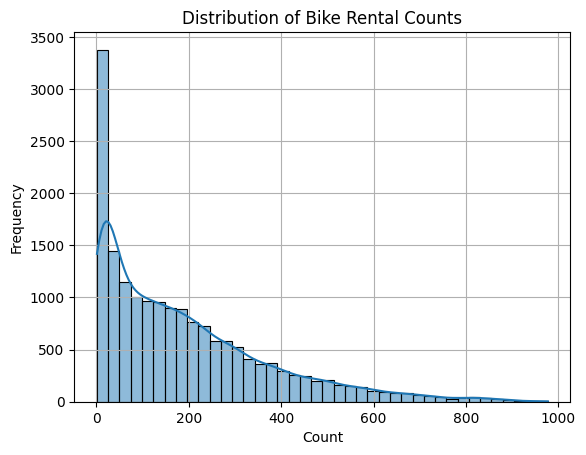

In [24]:
sns.histplot(data=df,x='count',bins=40,kde=True)  #plotting histplot using seaborn
plt.title('Distribution of Bike Rental Counts')
plt.xlabel('Count')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

## Binning into categories

In [25]:
df['cnt_class'] = pd.cut(df['count'], bins=[0, 100, 300, df['count'].max()], 
                         labels=['Low', 'Medium', 'High'])

In [26]:
df

,instant,date,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,count,cnt_class
0,1,2011-01-01,winter,2011,jan,0,0,sat,holiday,1,0.24,0.2879,0.81,0.0000,3,13,16,Low
1,2,2011-01-01,winter,2011,jan,1,0,sat,holiday,1,0.22,0.2727,0.80,0.0000,8,32,40,Low
2,3,2011-01-01,winter,2011,jan,2,0,sat,holiday,1,0.22,0.2727,0.80,0.0000,5,27,32,Low
3,4,2011-01-01,winter,2011,jan,3,0,sat,holiday,1,0.24,0.2879,0.75,0.0000,3,10,13,Low
4,5,2011-01-01,winter,2011,jan,4,0,sat,holiday,1,0.24,0.2879,0.75,0.0000,0,1,1,Low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,17375,2012-12-31,winter,2012,dec,19,0,mon,workday,2,0.26,0.2576,0.60,0.1642,11,108,119,Medium
17375,17376,2012-12-31,winter,2012,dec,20,0,mon,workday,2,0.26,0.2576,0.60,0.1642,8,81,89,Low
17376,17377,2012-12-31,winter,2012,dec,21,0,mon,workday,1,0.26,0.2576,0.60,0.1642,7,83,90,Low
17377,17378,2012-12-31,winter,2012,dec,22,0,mon,workday,1,0.26,0.2727,0.56,0.1343,13,48,61,Low


# PLOTING USING MATPLOTLIB AND SEABORN

## 1.Univariate Analysis
Focus: Distributions and individual feature characteristics.



### Target Variable (cnt_class)


Text(0, 0.5, 'Count')

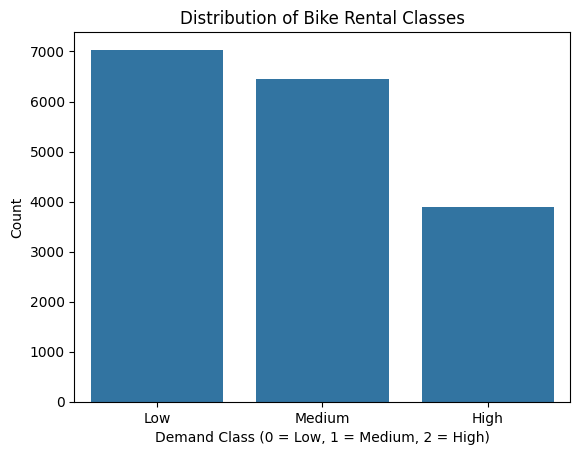

In [27]:
sns.countplot(data=df, x='cnt_class')
plt.title("Distribution of Bike Rental Classes")
plt.xlabel("Demand Class (0 = Low, 1 = Medium, 2 = High)")
plt.ylabel("Count")


In [29]:
df['cnt_class'].value_counts()

cnt_class
Low       7035
Medium    6453
High      3891
Name: count, dtype: int64

In [28]:
# Default rate
print(df['cnt_class'].value_counts(normalize=True) * 100)


cnt_class
Low       40.47989
Medium    37.13102
High      22.38909
Name: proportion, dtype: float64


Low demand days dominate (≈ 40.5%)
Medium demand follows closely (≈ 37.1%)
High demand days are underrepresented (≈ 22.4%)

This class imbalance was addressed using SMOTE during preprocessing.



### a.Hour of the Day (hr)


Text(0.5, 1.0, 'Distribution of Rides by Hour')

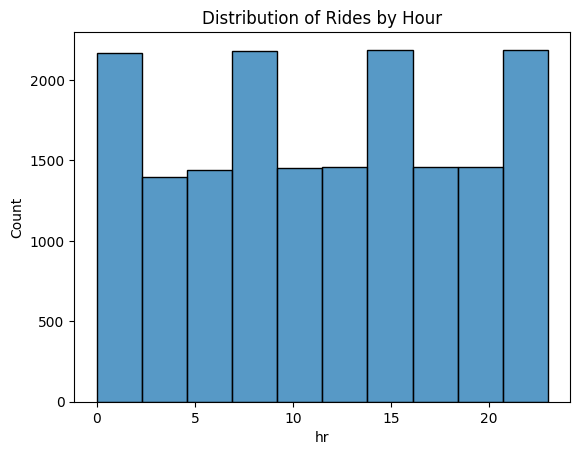

In [35]:
sns.histplot(df['hr'], bins=10, kde=False)
plt.title("Distribution of Rides by Hour")


Demand spikes during commuting hours (morning/evening).
Peak hours: 7-9 AM and 5-7 PM (commute hours).

## b.Temperature (temp)


Text(0.5, 1.0, 'Temperature Distribution')

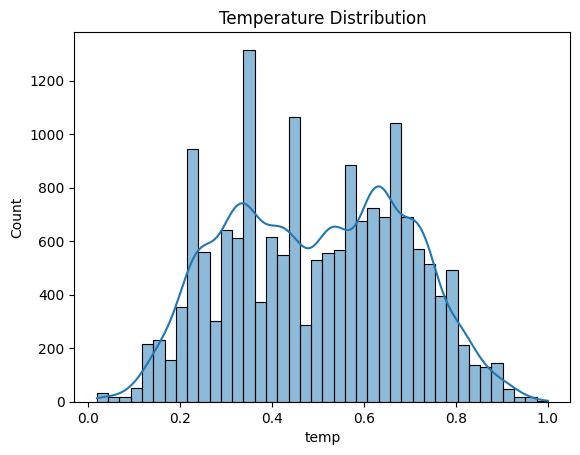

In [36]:
sns.histplot(df['temp'], kde=True)
plt.title("Temperature Distribution")

Rentals increase with pleasant temperatures (20°C to 30°C scaled).



### c.Humidity

Text(0.5, 1.0, 'Boxplot of Humidity')

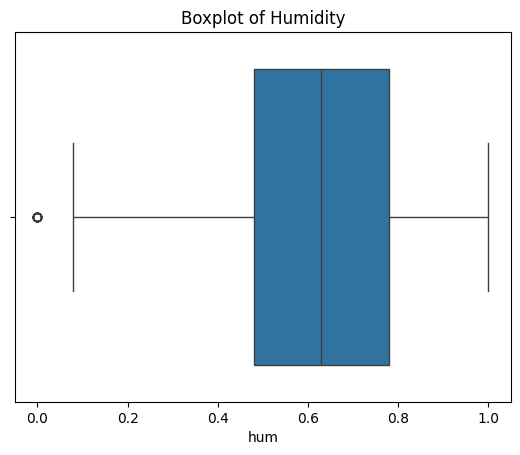

In [38]:
sns.boxplot(x=df['hum'])
plt.title("Boxplot of Humidity")

Rentals tend to drop in extreme humidity.Skewed slightly toward higher humidity; possible correlation with reduced demand.





### d.Windspeed



Text(0.5, 1.0, 'Distribution of Windspeed')

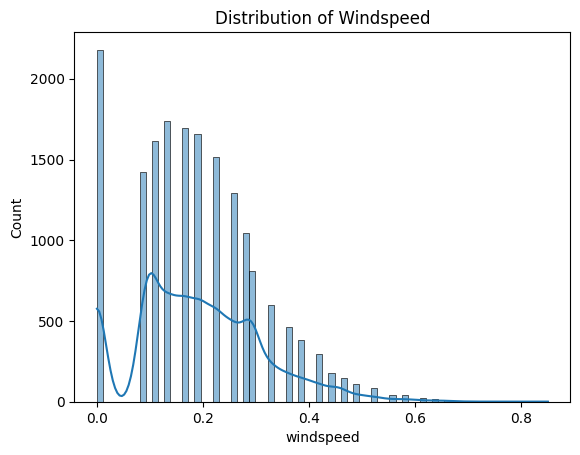

In [40]:
sns.histplot(df['windspeed'], kde=True)
plt.title("Distribution of Windspeed")


Generally low wind speeds dominate.



### e.Season

Text(0.5, 1.0, 'Season Distribution')

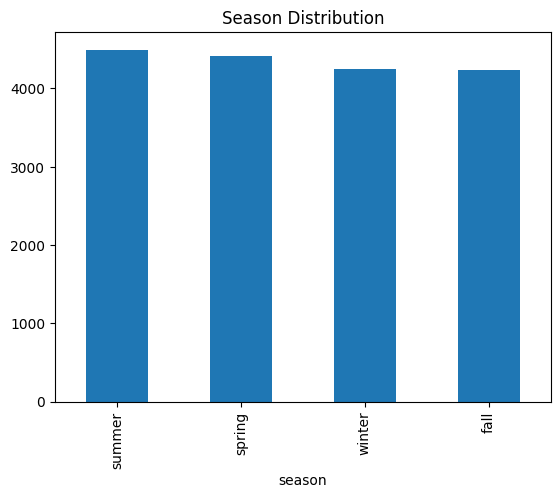

In [41]:
df['season'].value_counts().plot(kind='bar')
plt.title("Season Distribution")


More rentals during spring and summer.



## 2. Bivariate Analysis
Focus: Relationship between target variable and features.



### a.Hour vs Bike Class


Text(0.5, 1.0, 'Hour vs Bike Demand Class')

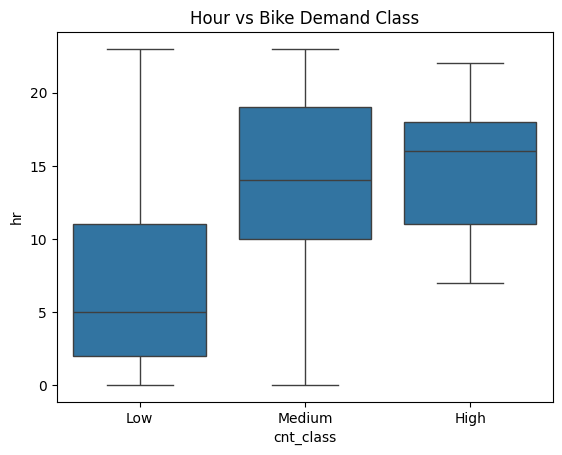

In [42]:
sns.boxplot(x='cnt_class', y='hr', data=df)
plt.title("Hour vs Bike Demand Class")


High demand typically clusters around rush hours.Class 2 (High demand) peaks during commute hours.



### Weather Situation vs Bike Class


Text(0.5, 1.0, 'Weather vs Demand Class')

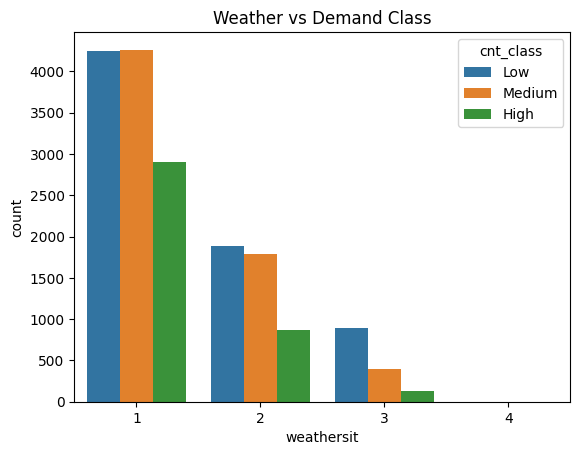

In [44]:
sns.countplot(x='weathersit', hue='cnt_class', data=df)
plt.title("Weather vs Demand Class")


Clear preference for clear/partly cloudy weather for high demand.Bad weather reduces high-demand instances.



### Temp vs Bike Class


Text(0.5, 1.0, 'Temperature vs Demand Class')

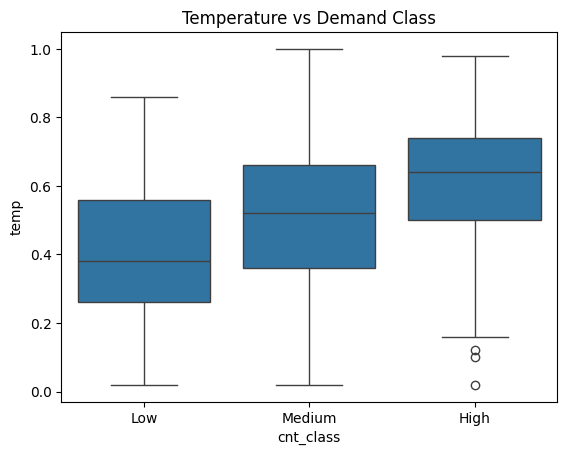

In [45]:
sns.boxplot(x='cnt_class', y='temp', data=df)
plt.title("Temperature vs Demand Class")


High demand aligns with mild temperatures (≈ 25°C scaled).High demand usually occurs in comfortable temperatures.



### Weekday vs Demand



Text(0.5, 1.0, 'Weekday vs Bike Demand')

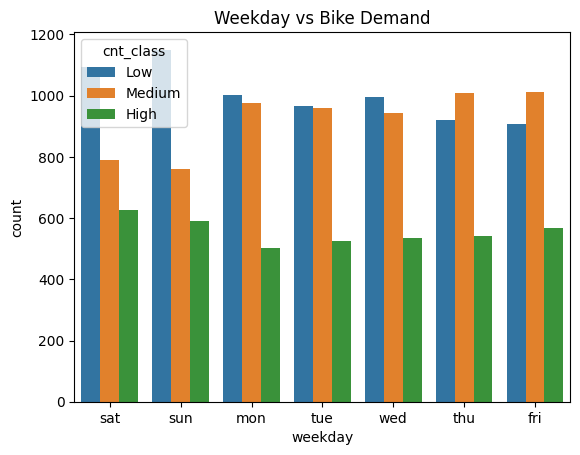

In [46]:
sns.countplot(x='weekday', hue='cnt_class', data=df)
plt.title("Weekday vs Bike Demand")


Weekdays show more medium/high demand than weekends.



### Season vs Demand

Text(0.5, 1.0, 'Season vs Demand Class')

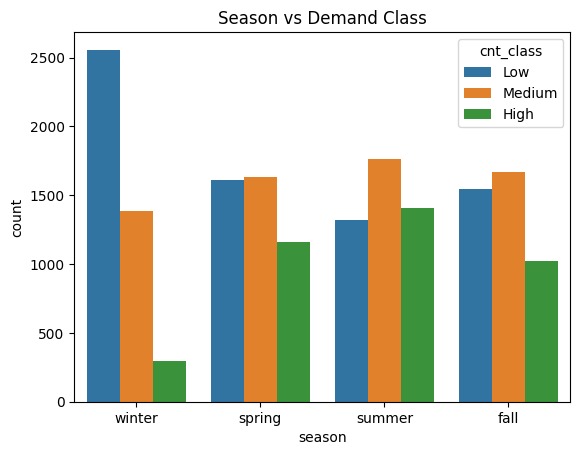

In [47]:
sns.countplot(x='season', hue='cnt_class', data=df)
plt.title("Season vs Demand Class")


#### Temperature and season significantly affect bike usage.
#### Humidity and bad weather lower rental demand.
#### Weekdays generally exhibit higher usage patterns than weekends.


## Correlation analysis with heatmap for numerical columns

Text(0.5, 1.0, 'Correlation Heatmap')

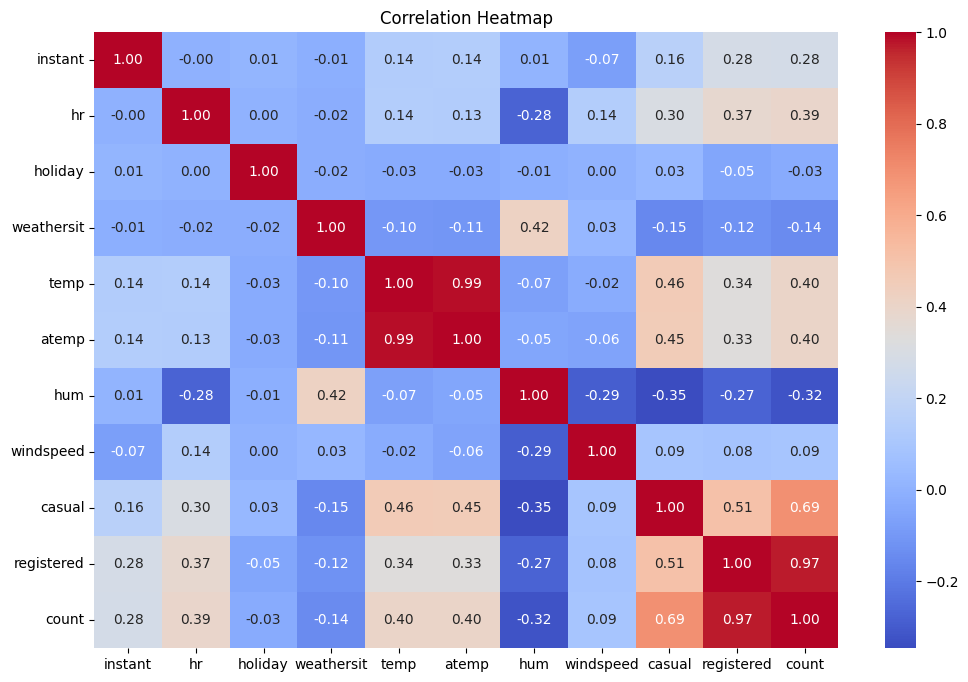

In [48]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(numeric_only=True), annot=True, fmt='.2f', cmap='coolwarm')
plt.title("Correlation Heatmap")


temp and atemp strongly correlated (drop one).

count (before dropping) positively correlated with temp, hr, and negatively with hum.

## scatter plot to find correlation

Text(0.5, 1.0, 'Normalized temperature vs Normalized feeling temperature in Celsius')

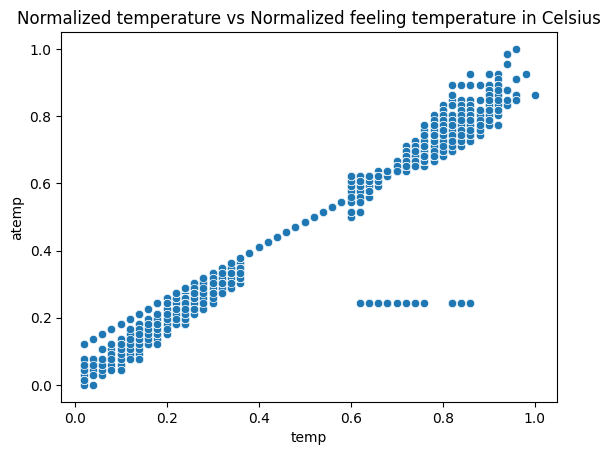

In [51]:
sns.scatterplot(x=df['temp'],y=df['atemp'],data=df)  #ploting scatterplot using seaborn
plt.title('Normalized temperature vs Normalized feeling temperature in Celsius')

## LINE PLOTS - trend of count by each month

Text(0.5, 1.0, 'line plot using sns')

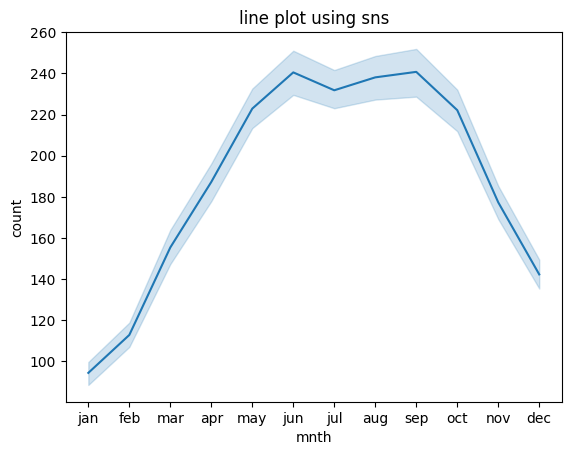

In [52]:
sns.lineplot(x=df['mnth'],y=df['count'],data=df) #ploting lineplot using seaborn
plt.title('line plot using sns')

## Pie Plot

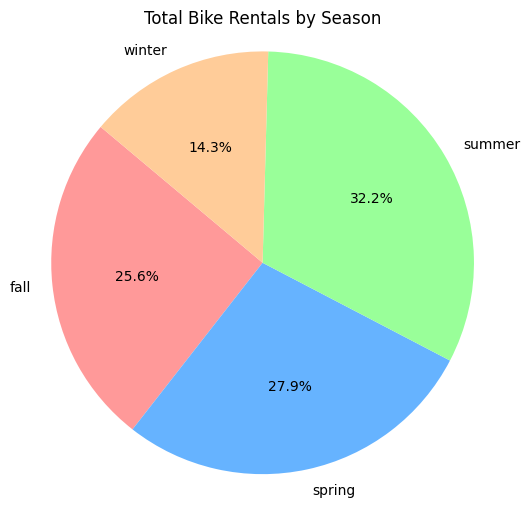

In [53]:
season_counts = df.groupby('season')['count'].sum() #plotting pieplot using matplotlib
plt.figure(figsize=(6, 6))
plt.pie(season_counts, labels=season_counts.index, autopct='%1.1f%%', 
        startangle=140, colors=['#ff9999', '#66b3ff', '#99ff99', '#ffcc99'])
plt.title('Total Bike Rentals by Season')
plt.axis('equal')  # Equal aspect ratio to ensure the pie is circular
plt.show()

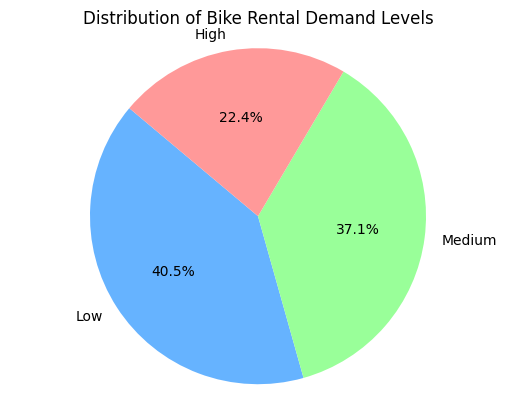

In [54]:
df['cnt_class'] = pd.cut(df['count'], bins=[0, 100, 300, df['count'].max()], 
                         labels=['Low', 'Medium', 'High'])
demand_counts = df['cnt_class'].value_counts().sort_index()  # Count distribution
plt.pie(demand_counts, labels=demand_counts.index, autopct='%1.1f%%', 
        startangle=140, colors=['#66b3ff', '#99ff99', '#ff9999'])   #plotting pieplot using matplotlib
plt.title('Distribution of Bike Rental Demand Levels')
plt.axis('equal')  # Ensures pie is drawn as a circle
plt.show()

The pie chart will visualize how your dataset's count variable has been split into:

Low demand (0–100 rentals)

Medium demand (100–300 rentals)

High demand (300+ rentals)

## Hour, temperature, weather, and season show strong relationships with cnt_class.



## Boxplots

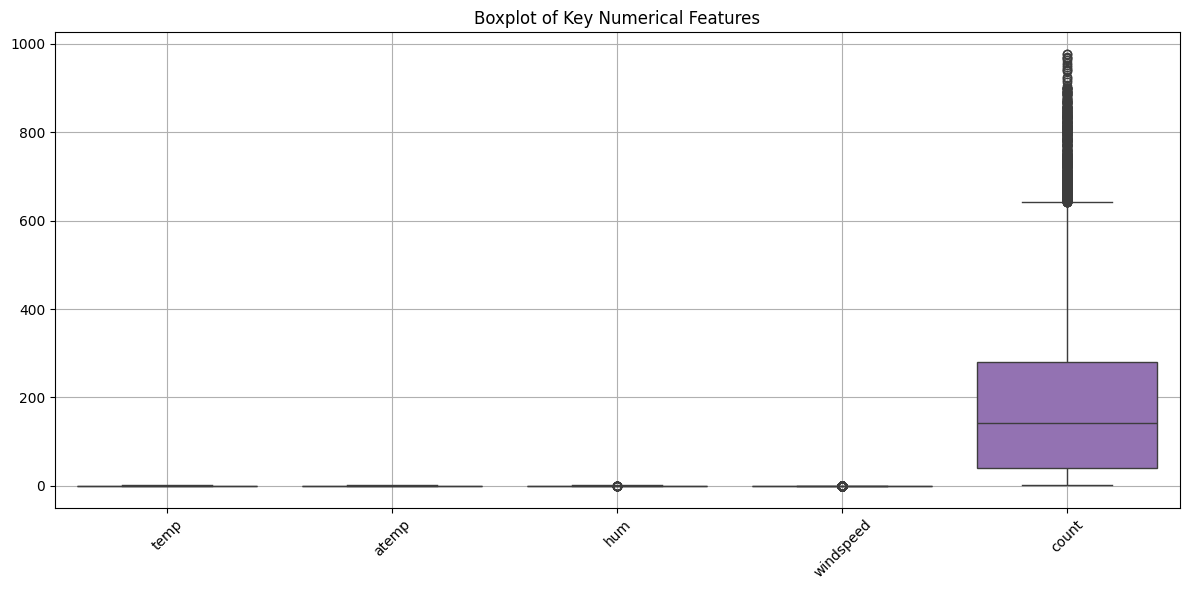

In [56]:
numeric_cols = ['temp', 'atemp', 'hum', 'windspeed', 'count']
plt.figure(figsize=(12, 6))
sns.boxplot(data=df[numeric_cols])  #plotting boxplot using seaborn
plt.title('Boxplot of Key Numerical Features')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

# Statistical Analysis

## Checking for Skewness for all numerical columns 

In [58]:
a=df.select_dtypes(include='number').skew() #checking for skewness
a

instant       0.000000
hr           -0.010680
holiday       5.638538
weathersit    1.228047
temp         -0.006021
atemp        -0.090429
hum          -0.111287
windspeed     0.574905
casual        2.499237
registered    1.557904
count         1.277412
dtype: float64

- holiday, casual, registered, and count have strong right skewness
- hr, temp, and atemp are almost symmetric → good features as-is.



## find mean value for all numerical columns 

In [65]:
b=df.select_dtypes(include='number').mean()  #checking for mean
b

instant       8690.000000
hr              11.546752
holiday          0.028770
weathersit       1.425283
temp             0.496987
atemp            0.475775
hum              0.627229
windspeed        0.190098
casual          35.676218
registered     153.786869
count          189.463088
dtype: float64

## Finding correlations between all numerical columns

In [66]:
co=df.select_dtypes(include='number').corr()   #finding  correlations
co

,instant,hr,holiday,weathersit,temp,atemp,hum,windspeed,casual,registered,count
instant,1.000000,-0.004775,0.014723,-0.014198,0.136178,0.137615,0.009577,-0.074505,0.158295,0.282046,0.278379
hr,-0.004775,1.000000,0.000479,-0.020203,0.137603,0.133750,-0.276498,0.137252,0.301202,0.374141,0.394071
holiday,0.014723,0.000479,1.000000,-0.017036,-0.027340,-0.030973,-0.010588,0.003988,0.031564,-0.047345,-0.030927
weathersit,-0.014198,-0.020203,-0.017036,1.000000,-0.102640,-0.105563,0.418130,0.026226,-0.152628,-0.120966,-0.142426
temp,0.136178,0.137603,-0.027340,-0.102640,1.000000,0.987672,-0.069881,-0.023125,0.459616,0.335361,0.404772
atemp,0.137615,0.133750,-0.030973,-0.105563,0.987672,1.000000,-0.051918,-0.062336,0.454080,0.332559,0.400929
hum,0.009577,-0.276498,-0.010588,0.418130,-0.069881,-0.051918,1.000000,-0.290105,-0.347028,-0.273933,-0.322911
windspeed,-0.074505,0.137252,0.003988,0.026226,-0.023125,-0.062336,-0.290105,1.000000,0.090287,0.082321,0.093234
casual,0.158295,0.301202,0.031564,-0.152628,0.459616,0.454080,-0.347028,0.090287,1.000000,0.506618,0.694564
registered,0.282046,0.374141,-0.047345,-0.120966,0.335361,0.332559,-0.273933,0.082321,0.506618,1.000000,0.972151


In [67]:
pearson = df['atemp'].corr(df['count'], method='pearson')  #using pearson method
pearson

np.float64(0.4009293041266319)

## Kurtosis

In [68]:
k=df.select_dtypes(include='number').kurt()  #checking for kurtosis of all numerical columns
k

instant       -1.200000
hr            -1.198021
holiday       29.796540
weathersit     0.350151
temp          -0.941844
atemp         -0.845412
hum           -0.826117
windspeed      0.590820
casual         7.571002
registered     2.750018
count          1.417203
dtype: float64

## Outlier detection using box plot

<Axes: >

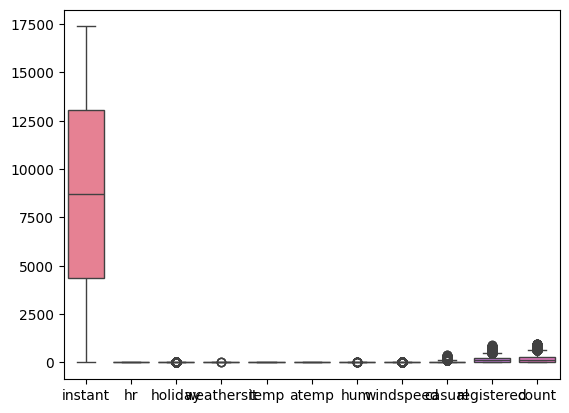

In [69]:
sns.boxplot(data=df)    #plotting boxplot for outlier detection

# Caping/Imputing outlier data point using IQR

In [70]:
for col in df.select_dtypes(include='number').columns:
    q1=df[col].quantile(0.25)
    q3=df[col].quantile(0.75)
    iqr=q3-q1
    #define bounds(lower and upper)
    lower_bound=q1-1.5*iqr
    upper_bound=q3+1.5*iqr
    #removing outliers
    clean_data=df[(df[col]>=lower_bound) & (df[col]<=upper_bound)][col]

 # Function to apply IQR method to fix outliers


In [71]:
def fix_outliers_iqr(df):
    num=df.select_dtypes(include='number').columns
    for col in num:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
# Replace outliers with the respective bounds
        df[col] = df[col].apply(lambda x: lower_bound if x < lower_bound else upper_bound if x > upper_bound else x)
    return df


## Creating a new dataframe with a function fix_outliers_iqr

In [72]:
df1=fix_outliers_iqr(df)  #calling function into new dataframe
df1.head(2)

,instant,date,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,count,cnt_class
0,1,2011-01-01,winter,2011,jan,0,0.0,sat,holiday,1.0,0.24,0.2879,0.81,0.0,3.0,13.0,16.0,Low
1,2,2011-01-01,winter,2011,jan,1,0.0,sat,holiday,1.0,0.22,0.2727,0.80,0.0,8.0,32.0,40.0,Low


# Visualising a box plot with capped or imputed outliers

<Axes: >

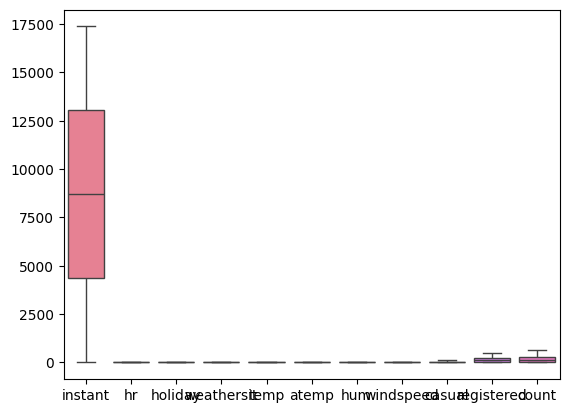

In [73]:
sns.boxplot(data=df1)  #outliers capped/imputed boxplot

# Finding correlation between numerical columns and plotting heat map

In [74]:
co

,instant,hr,holiday,weathersit,temp,atemp,hum,windspeed,casual,registered,count
instant,1.000000,-0.004775,0.014723,-0.014198,0.136178,0.137615,0.009577,-0.074505,0.158295,0.282046,0.278379
hr,-0.004775,1.000000,0.000479,-0.020203,0.137603,0.133750,-0.276498,0.137252,0.301202,0.374141,0.394071
holiday,0.014723,0.000479,1.000000,-0.017036,-0.027340,-0.030973,-0.010588,0.003988,0.031564,-0.047345,-0.030927
weathersit,-0.014198,-0.020203,-0.017036,1.000000,-0.102640,-0.105563,0.418130,0.026226,-0.152628,-0.120966,-0.142426
temp,0.136178,0.137603,-0.027340,-0.102640,1.000000,0.987672,-0.069881,-0.023125,0.459616,0.335361,0.404772
atemp,0.137615,0.133750,-0.030973,-0.105563,0.987672,1.000000,-0.051918,-0.062336,0.454080,0.332559,0.400929
hum,0.009577,-0.276498,-0.010588,0.418130,-0.069881,-0.051918,1.000000,-0.290105,-0.347028,-0.273933,-0.322911
windspeed,-0.074505,0.137252,0.003988,0.026226,-0.023125,-0.062336,-0.290105,1.000000,0.090287,0.082321,0.093234
casual,0.158295,0.301202,0.031564,-0.152628,0.459616,0.454080,-0.347028,0.090287,1.000000,0.506618,0.694564
registered,0.282046,0.374141,-0.047345,-0.120966,0.335361,0.332559,-0.273933,0.082321,0.506618,1.000000,0.972151


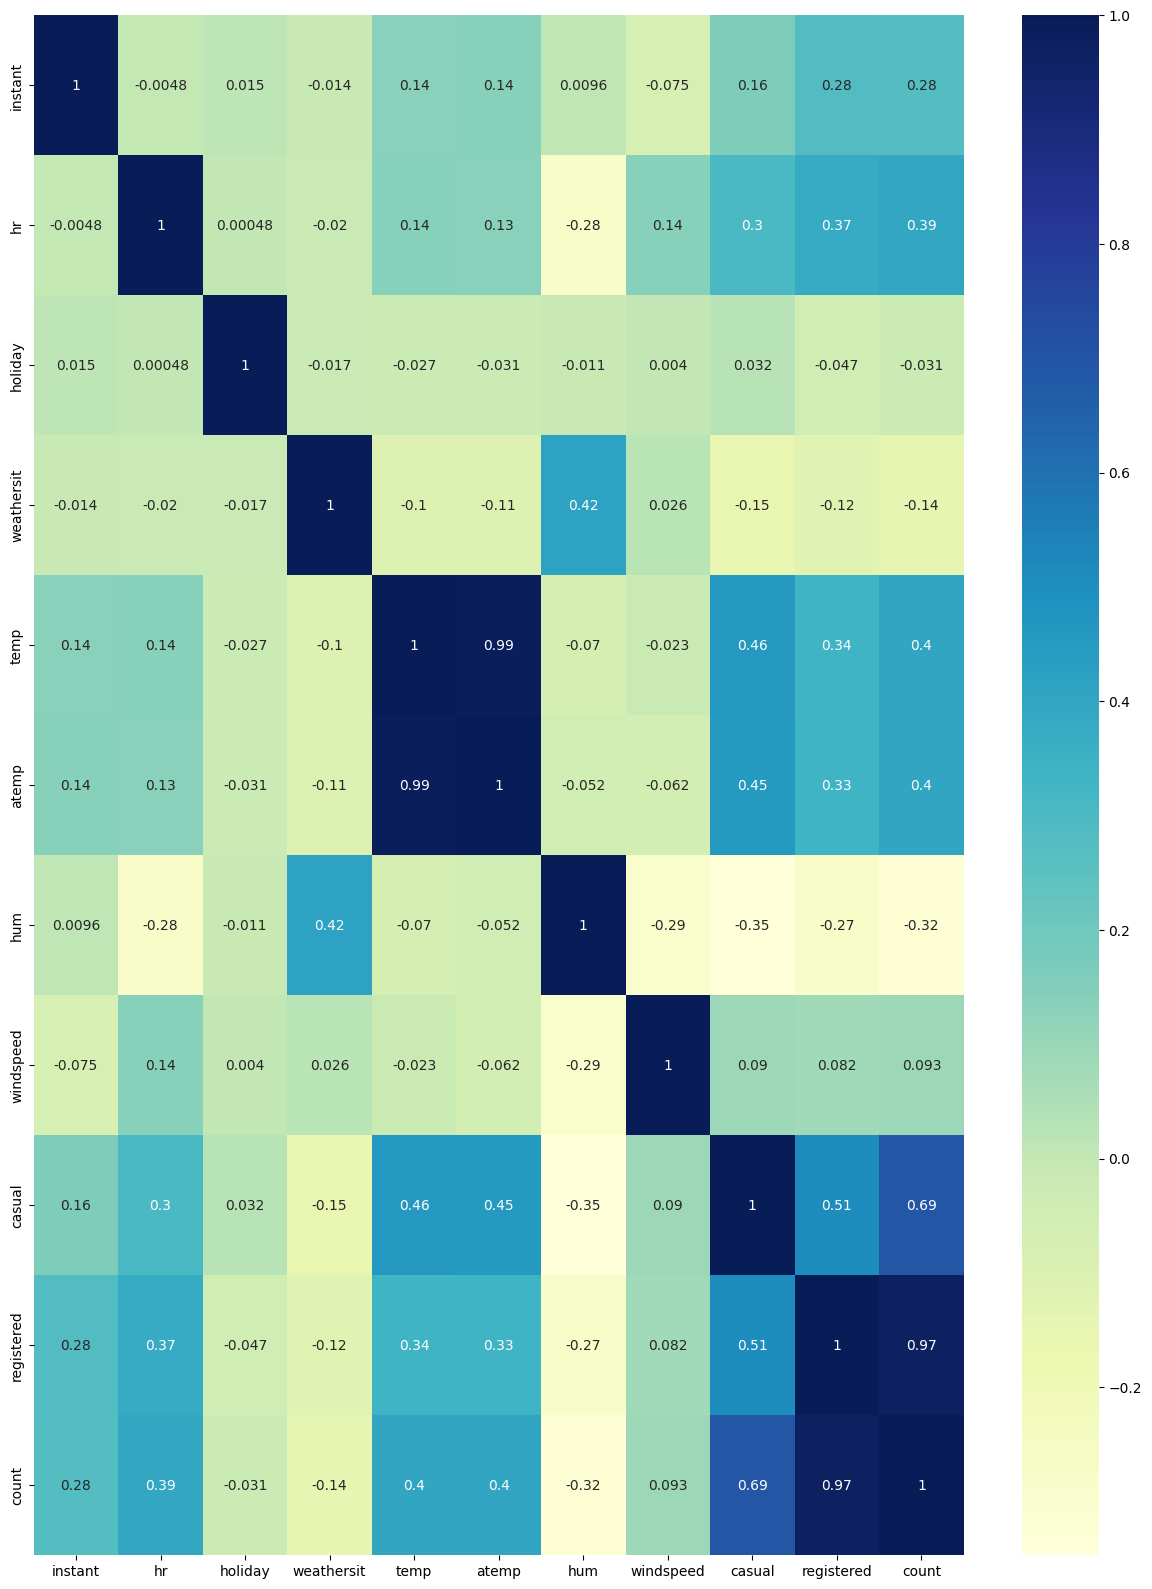

In [75]:
plt.figure(figsize=(15,20))
sns.heatmap(co,annot=True,cmap='YlGnBu') #plotting heatmap to visualize correlations
plt.show()

## SKEWNESS USING POWER TRANSFORMER FROM SKLEARN

In [76]:
from sklearn.preprocessing import PowerTransformer
pt=PowerTransformer(method='yeo-johnson')
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns

In [77]:
df_transformed = pd.DataFrame(
    pt.fit_transform(df[numeric_cols]),
    columns=numeric_cols
)

In [78]:
df_transformed.skew()

instant      -0.290779
hr           -0.244558
holiday       0.000000
weathersit    0.680252
temp         -0.035287
atemp        -0.042424
hum          -0.045369
windspeed     0.007055
casual       -0.076914
registered   -0.154369
count        -0.155453
dtype: float64

## Plotting Histplot 

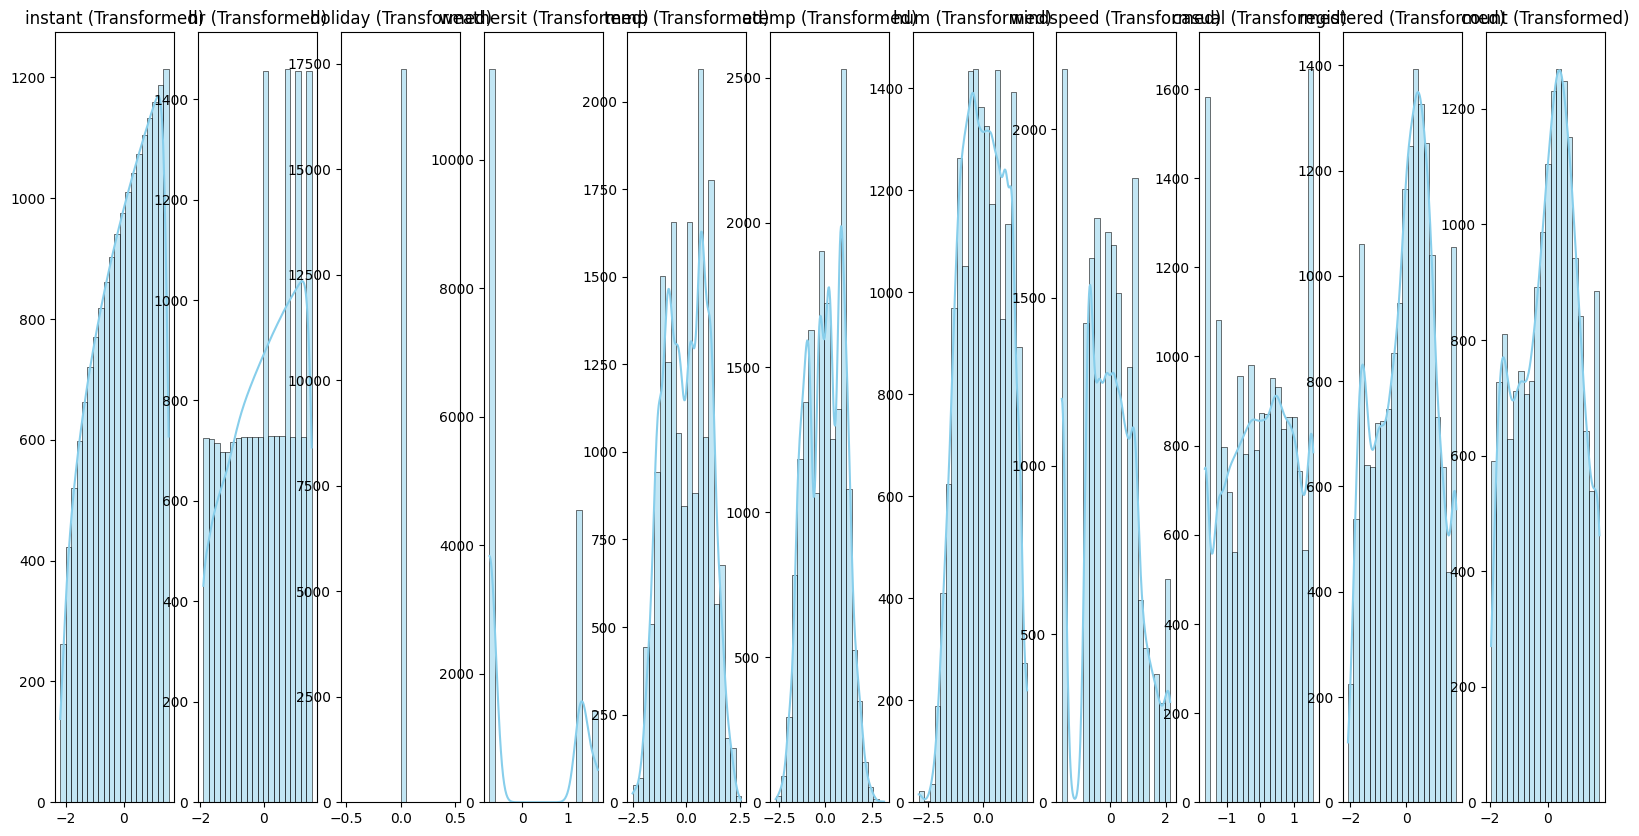

In [79]:
plt.figure(figsize=(20, 10))
for i, col in enumerate(numeric_cols):
    plt.subplot(1, len(numeric_cols), i + 1)
    sns.histplot(df_transformed[col], kde=True, bins=20, color='skyblue')
    plt.title(f"{col} (Transformed)")
    plt.xlabel('')
    plt.ylabel('')

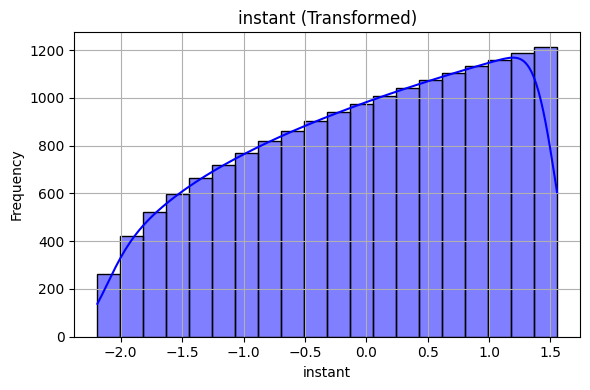

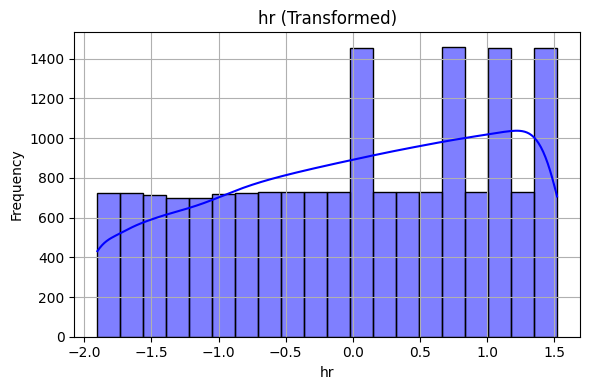

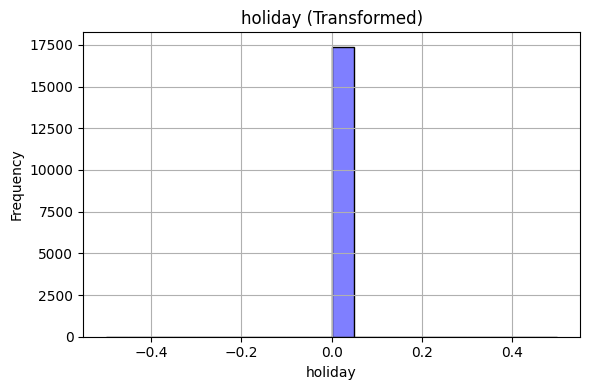

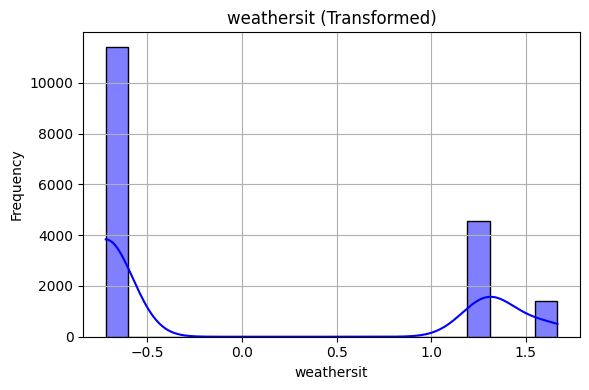

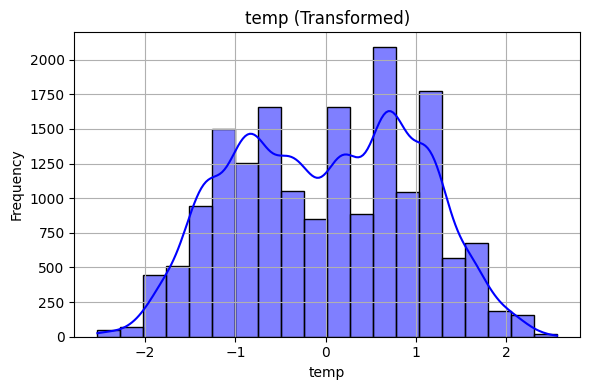

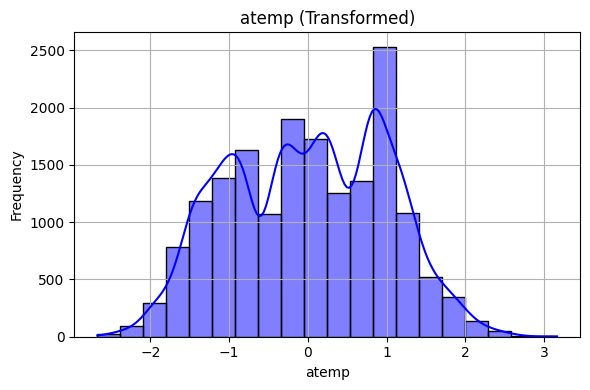

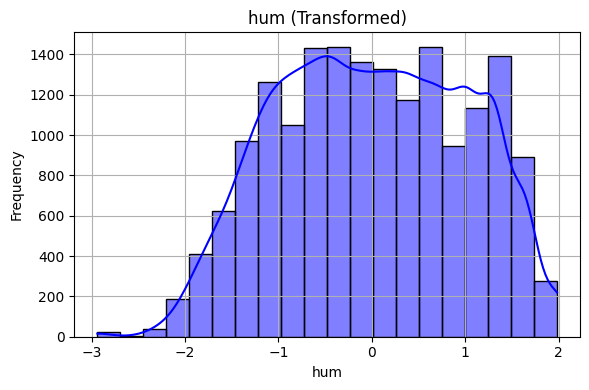

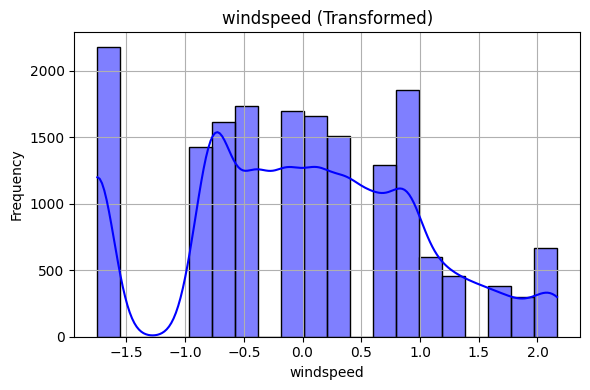

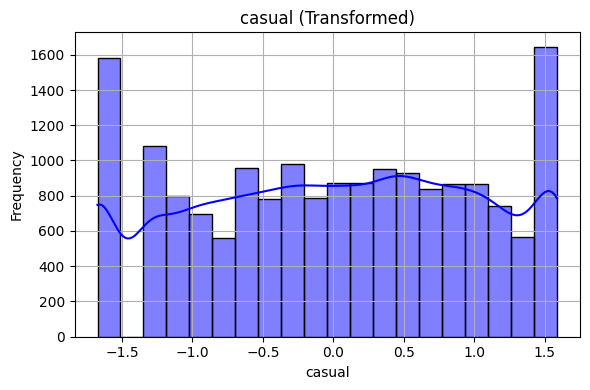

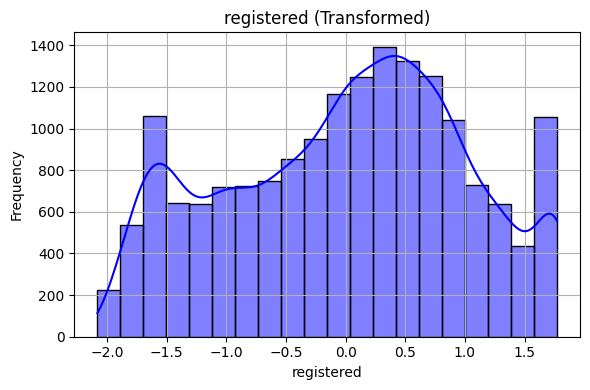

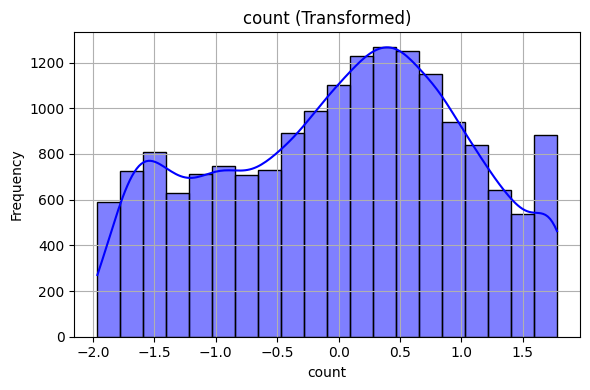

In [81]:
# Plot each column individually
for col in numeric_cols:
    plt.figure(figsize=(6, 4))
    sns.histplot(df_transformed[col], kde=True, bins=20, color='blue')
    plt.title(f"{col} (Transformed)")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

In [82]:
df

,instant,date,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,count,cnt_class
0,1,2011-01-01,winter,2011,jan,0,0.0,sat,holiday,1.0,0.24,0.2879,0.81,0.0000,3.0,13.0,16.0,Low
1,2,2011-01-01,winter,2011,jan,1,0.0,sat,holiday,1.0,0.22,0.2727,0.80,0.0000,8.0,32.0,40.0,Low
2,3,2011-01-01,winter,2011,jan,2,0.0,sat,holiday,1.0,0.22,0.2727,0.80,0.0000,5.0,27.0,32.0,Low
3,4,2011-01-01,winter,2011,jan,3,0.0,sat,holiday,1.0,0.24,0.2879,0.75,0.0000,3.0,10.0,13.0,Low
4,5,2011-01-01,winter,2011,jan,4,0.0,sat,holiday,1.0,0.24,0.2879,0.75,0.0000,0.0,1.0,1.0,Low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,17375,2012-12-31,winter,2012,dec,19,0.0,mon,workday,2.0,0.26,0.2576,0.60,0.1642,11.0,108.0,119.0,Medium
17375,17376,2012-12-31,winter,2012,dec,20,0.0,mon,workday,2.0,0.26,0.2576,0.60,0.1642,8.0,81.0,89.0,Low
17376,17377,2012-12-31,winter,2012,dec,21,0.0,mon,workday,1.0,0.26,0.2576,0.60,0.1642,7.0,83.0,90.0,Low
17377,17378,2012-12-31,winter,2012,dec,22,0.0,mon,workday,1.0,0.26,0.2727,0.56,0.1343,13.0,48.0,61.0,Low


## Encoding Target Variable using LabelEncoder from Sklearn.preprocessing

In [83]:
from sklearn.preprocessing import LabelEncoder
le= LabelEncoder()
df['cnt_class'] = le.fit_transform(df['cnt_class'])  # Pass 1D Series, not DataFrame
df

,instant,date,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,count,cnt_class
0,1,2011-01-01,winter,2011,jan,0,0.0,sat,holiday,1.0,0.24,0.2879,0.81,0.0000,3.0,13.0,16.0,1
1,2,2011-01-01,winter,2011,jan,1,0.0,sat,holiday,1.0,0.22,0.2727,0.80,0.0000,8.0,32.0,40.0,1
2,3,2011-01-01,winter,2011,jan,2,0.0,sat,holiday,1.0,0.22,0.2727,0.80,0.0000,5.0,27.0,32.0,1
3,4,2011-01-01,winter,2011,jan,3,0.0,sat,holiday,1.0,0.24,0.2879,0.75,0.0000,3.0,10.0,13.0,1
4,5,2011-01-01,winter,2011,jan,4,0.0,sat,holiday,1.0,0.24,0.2879,0.75,0.0000,0.0,1.0,1.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,17375,2012-12-31,winter,2012,dec,19,0.0,mon,workday,2.0,0.26,0.2576,0.60,0.1642,11.0,108.0,119.0,2
17375,17376,2012-12-31,winter,2012,dec,20,0.0,mon,workday,2.0,0.26,0.2576,0.60,0.1642,8.0,81.0,89.0,1
17376,17377,2012-12-31,winter,2012,dec,21,0.0,mon,workday,1.0,0.26,0.2576,0.60,0.1642,7.0,83.0,90.0,1
17377,17378,2012-12-31,winter,2012,dec,22,0.0,mon,workday,1.0,0.26,0.2727,0.56,0.1343,13.0,48.0,61.0,1


# Encoding using One hot Encoder from sklearn.preprocessing

In [84]:
columns_to_encode = ['yr', 'mnth', 'weekday', 'workingday', 'season']
df_encoded = pd.get_dummies(df, columns=columns_to_encode, drop_first=True)
df_encoded

,instant,date,hr,holiday,weathersit,temp,atemp,hum,windspeed,casual,...,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,workingday_workday,season_spring,season_summer,season_winter
0,1,2011-01-01,0,0.0,1.0,0.24,0.2879,0.81,0.0000,3.0,...,False,True,False,False,False,False,False,False,False,True
1,2,2011-01-01,1,0.0,1.0,0.22,0.2727,0.80,0.0000,8.0,...,False,True,False,False,False,False,False,False,False,True
2,3,2011-01-01,2,0.0,1.0,0.22,0.2727,0.80,0.0000,5.0,...,False,True,False,False,False,False,False,False,False,True
3,4,2011-01-01,3,0.0,1.0,0.24,0.2879,0.75,0.0000,3.0,...,False,True,False,False,False,False,False,False,False,True
4,5,2011-01-01,4,0.0,1.0,0.24,0.2879,0.75,0.0000,0.0,...,False,True,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,17375,2012-12-31,19,0.0,2.0,0.26,0.2576,0.60,0.1642,11.0,...,True,False,False,False,False,False,True,False,False,True
17375,17376,2012-12-31,20,0.0,2.0,0.26,0.2576,0.60,0.1642,8.0,...,True,False,False,False,False,False,True,False,False,True
17376,17377,2012-12-31,21,0.0,1.0,0.26,0.2576,0.60,0.1642,7.0,...,True,False,False,False,False,False,True,False,False,True
17377,17378,2012-12-31,22,0.0,1.0,0.26,0.2727,0.56,0.1343,13.0,...,True,False,False,False,False,False,True,False,False,True


In [85]:
df_encoded.dtypes

instant                 int64
date                   object
hr                      int64
holiday               float64
weathersit            float64
temp                  float64
atemp                 float64
hum                   float64
windspeed             float64
casual                float64
registered            float64
count                 float64
cnt_class               int64
yr_2012                  bool
mnth_aug                 bool
mnth_dec                 bool
mnth_feb                 bool
mnth_jan                 bool
mnth_jul                 bool
mnth_jun                 bool
mnth_mar                 bool
mnth_may                 bool
mnth_nov                 bool
mnth_oct                 bool
mnth_sep                 bool
weekday_mon              bool
weekday_sat              bool
weekday_sun              bool
weekday_thu              bool
weekday_tue              bool
weekday_wed              bool
workingday_workday       bool
season_spring            bool
season_sum

# Feature Selection

In [89]:
df_encoded = df_encoded.drop(['date', 'casual', 'registered', 'count'], axis=1, errors='ignore')


- date: likely not useful for classification after feature engineering.
- casual & registered: components of count—might introduce data leakage.
- count: the original regression target, now replaced by 'cnt_class' for classification.

This step is important to:

- avoid multicollinearity, and
- ensure proper target variable usage.

## Training and Splitting

In [90]:
X = df_encoded.drop('cnt_class', axis=1)
y = df_encoded['cnt_class']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


# Scaling

In [91]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [92]:
y.value_counts()   

cnt_class
1    7035
2    6453
0    3891
Name: count, dtype: int64

# smote technique

In [93]:
from imblearn.over_sampling import SMOTE
smote= SMOTE()


In [94]:
x_smote, y_smote = smote.fit_resample(df_encoded[(i for i in list(df_encoded.describe(include='all').columns) if i != 'cnt_class')], df_encoded['cnt_class'])


In [95]:
print('length of y smote',len(y_smote))

length of y smote 21105


In [96]:
balanced_df = pd.DataFrame(x_smote, columns=list(i for i in list(df_encoded.describe(include='all').columns) if i != 'cnt_class'))

In [97]:
balanced_df['cnt_class'] = y_smote
balanced_df

,instant,hr,holiday,weathersit,temp,atemp,hum,windspeed,yr_2012,mnth_aug,...,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,workingday_workday,season_spring,season_summer,season_winter,cnt_class
0,1,0,0.0,1.000000,0.240000,0.287900,0.810000,0.000000,False,False,...,True,False,False,False,False,False,False,False,True,1
1,2,1,0.0,1.000000,0.220000,0.272700,0.800000,0.000000,False,False,...,True,False,False,False,False,False,False,False,True,1
2,3,2,0.0,1.000000,0.220000,0.272700,0.800000,0.000000,False,False,...,True,False,False,False,False,False,False,False,True,1
3,4,3,0.0,1.000000,0.240000,0.287900,0.750000,0.000000,False,False,...,True,False,False,False,False,False,False,False,True,1
4,5,4,0.0,1.000000,0.240000,0.287900,0.750000,0.000000,False,False,...,True,False,False,False,False,False,False,False,True,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21100,9850,9,0.0,1.000000,0.209939,0.193093,0.572608,0.341516,True,False,...,False,False,False,False,False,False,False,False,True,2
21101,15888,16,0.0,3.000000,0.300000,0.287747,0.869395,0.225254,True,False,...,False,False,False,True,False,True,False,False,False,2
21102,4503,12,0.0,1.000000,0.848170,0.809209,0.517746,0.271386,False,False,...,False,False,False,False,False,True,False,True,False,2
21103,16771,13,0.0,1.000000,0.296840,0.313412,0.424740,0.095494,True,False,...,False,False,True,False,False,True,False,False,False,2


In [98]:
balanced_df.to_csv("balanced dataset.csv",index=False)

## FEATURE SELECTION

In [102]:
from sklearn.feature_selection import SelectKBest,f_classif       #f_regressor
skb= SelectKBest(score_func=f_classif,k=20)
y= balanced_df['cnt_class']
X= balanced_df.drop('cnt_class', axis=1)
# Drop constant features
X = X.loc[:, (X != X.iloc[0]).any()]

In [103]:
X_new = skb.fit_transform(X , y)

In [104]:
selected_columns= X.columns[skb.get_support()]
selected_columns

Index(['instant', 'hr', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'yr_2012', 'mnth_aug', 'mnth_dec', 'mnth_feb', 'mnth_jan', 'mnth_jul',
       'mnth_jun', 'mnth_mar', 'mnth_sep', 'workingday_workday',
       'season_spring', 'season_summer', 'season_winter'],
      dtype='object')

# feature selection score for each columns

In [105]:
feature_scores = pd.DataFrame({
    'Feature': X.columns,
    'Score': skb.scores_
}).sort_values(by='Score', ascending=False)
feature_scores

,Feature,Score
1,hr,3274.022708
3,temp,2581.822796
4,atemp,2561.155894
5,hum,1526.465194
28,season_winter,954.935130
0,instant,825.027200
7,yr_2012,591.607875
11,mnth_jan,385.760893
27,season_summer,275.126602
2,weathersit,269.684615


In [106]:
X_selected= X[selected_columns]
X_selected

,instant,hr,weathersit,temp,atemp,hum,windspeed,yr_2012,mnth_aug,mnth_dec,mnth_feb,mnth_jan,mnth_jul,mnth_jun,mnth_mar,mnth_sep,workingday_workday,season_spring,season_summer,season_winter
0,1,0,1.000000,0.240000,0.287900,0.810000,0.000000,False,False,False,False,True,False,False,False,False,False,False,False,True
1,2,1,1.000000,0.220000,0.272700,0.800000,0.000000,False,False,False,False,True,False,False,False,False,False,False,False,True
2,3,2,1.000000,0.220000,0.272700,0.800000,0.000000,False,False,False,False,True,False,False,False,False,False,False,False,True
3,4,3,1.000000,0.240000,0.287900,0.750000,0.000000,False,False,False,False,True,False,False,False,False,False,False,False,True
4,5,4,1.000000,0.240000,0.287900,0.750000,0.000000,False,False,False,False,True,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21100,9850,9,1.000000,0.209939,0.193093,0.572608,0.341516,True,False,False,True,False,False,False,False,False,False,False,False,True
21101,15888,16,3.000000,0.300000,0.287747,0.869395,0.225254,True,False,False,False,False,False,False,False,False,True,False,False,False
21102,4503,12,1.000000,0.848170,0.809209,0.517746,0.271386,False,False,False,False,False,True,False,False,False,True,False,True,False
21103,16771,13,1.000000,0.296840,0.313412,0.424740,0.095494,True,False,True,False,False,False,False,False,False,True,False,False,False


In [107]:
X_selected.to_csv('Featured Data.csv',index=False)

# SCALING (0-1)
- Standard scaler(0-1)
- Min-Max scaler 

In [108]:
from sklearn.preprocessing import StandardScaler
ss= StandardScaler()
X_scaled= ss.fit_transform(X_selected)
X_scaled

array([[-1.81284596, -1.83680389, -0.65343272, ..., -0.59506288,
        -0.61633003,  1.90400802],
       [-1.81264453, -1.68331388, -0.65343272, ..., -0.59506288,
        -0.61633003,  1.90400802],
       [-1.8124431 , -1.52982386, -0.65343272, ..., -0.59506288,
        -0.61633003,  1.90400802],
       ...,
       [-0.90600487,  0.00507633, -0.65343272, ..., -0.59506288,
         1.62250736, -0.52520787],
       [ 1.56514717,  0.15856635, -0.65343272, ..., -0.59506288,
        -0.61633003, -0.52520787],
       [-1.11327708,  0.46554639, -0.09610886, ...,  1.68049467,
        -0.61633003, -0.52520787]], shape=(21105, 20))

## PCA

Explained variance ratio: [0.19695474 0.09917211]


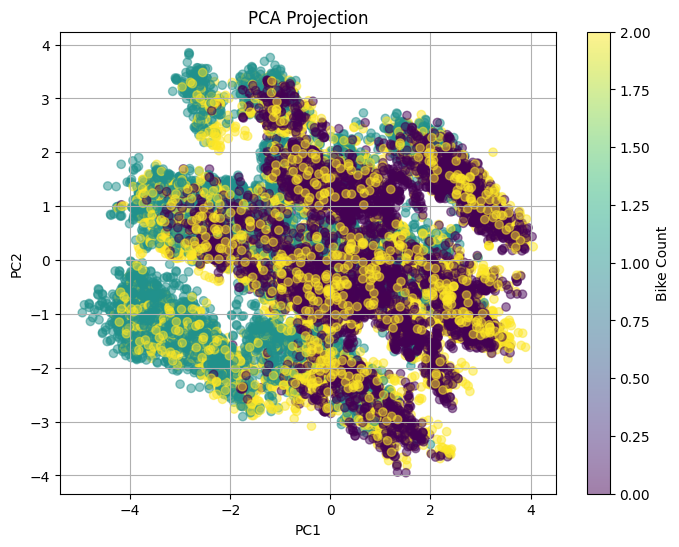

In [109]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
# Reduce to 2 components
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Explained variance
print("Explained variance ratio:", pca.explained_variance_ratio_)

# Plot
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis', alpha=0.5)
plt.title('PCA Projection')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.colorbar(label='Bike Count')
plt.grid(True)
plt.show()


# Training and testing

In [110]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test= train_test_split(X_scaled,y,test_size=0.2,random_state=40)

In [111]:
print('X_train Shape:',X_train.shape)
print('X_test Shape:',X_test.shape)
print('y_train Shape:',y_train.shape)
print('y_test Shape:',y_test.shape)

X_train Shape: (16884, 20)
X_test Shape: (4221, 20)
y_train Shape: (16884,)
y_test Shape: (4221,)


In [112]:
y.value_counts()   

cnt_class
1    7035
2    7035
0    7035
Name: count, dtype: int64

## Model Building ---> Machine Learning

In [116]:
#Define models
models = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(n_estimators=100),
    "AdaBoost": AdaBoostClassifier(n_estimators=100),
    "Gradient Boosting": GradientBoostingClassifier(n_estimators=100)
}


In [117]:
from sklearn.metrics import accuracy_score, precision_score, f1_score, recall_score

# Store results
scores = []

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')  # or 'macro'
    f1 = f1_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    
    scores.append({
        "Model": name,
        "Accuracy": round(accuracy, 2),
        "Precision": round(precision, 2),
        "F1 Score": round(f1, 2),
        "Recall": round(recall, 2)
    })

# Convert to DataFrame for display
results_df = pd.DataFrame(scores)
print(results_df)


                 Model  Accuracy  Precision  F1 Score  Recall
0  Logistic Regression      0.63       0.63      0.63    0.63
1        Decision Tree      0.84       0.84      0.84    0.84
2        Random Forest      0.86       0.86      0.86    0.86
3             AdaBoost      0.65       0.69      0.65    0.65
4    Gradient Boosting      0.83       0.83      0.83    0.83


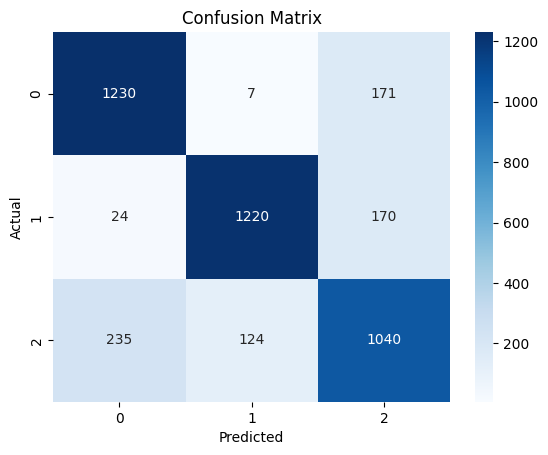

In [118]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

## Hyperparameter Tuning using GridSearchCV (Random Forest Example)


In [119]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
rf_param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'max_features': ['sqrt', 'log2']
}

# Initialize the model
rf = RandomForestClassifier(random_state=42)

# Set up GridSearchCV
rf_grid_search = GridSearchCV(estimator=rf, param_grid=rf_param_grid,
                              cv=5, n_jobs=-1, scoring='accuracy', verbose=2)

# Fit on training data
rf_grid_search.fit(X_train, y_train)

# Best estimator and score
print("Best Parameters (Random Forest):", rf_grid_search.best_params_)
print("Best Score (Random Forest):", rf_grid_search.best_score_)


Fitting 5 folds for each of 48 candidates, totalling 240 fits
Best Parameters (Random Forest): {'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Best Score (Random Forest): 0.8624736859463304


## Evaluate Tuned Model


In [120]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Get best model from grid search
best_rf = rf_grid_search.best_estimator_

# Predict on test set
y_pred_rf = best_rf.predict(X_test)

# Evaluate
print("🔍 Tuned Random Forest Evaluation:")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))


🔍 Tuned Random Forest Evaluation:
Accuracy: 0.8637763563136698

Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.88      0.88      1408
           1       0.92      0.89      0.91      1414
           2       0.78      0.82      0.80      1399

    accuracy                           0.86      4221
   macro avg       0.87      0.86      0.86      4221
weighted avg       0.87      0.86      0.86      4221


Confusion Matrix:
 [[1239    4  165]
 [   2 1261  151]
 [ 153  100 1146]]


## Creating a pipeline

In [121]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
import joblib

In [130]:
# 9. Pipeline: Scale + Feature Selection + Model
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('feature_selection', SelectKBest(score_func=f_classif, k=20)),
    ('classifier', RandomForestClassifier(n_estimators=100, random_state=42))
])


In [131]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('feature_selection', SelectKBest(k=20)),
                ('classifier', RandomForestClassifier(random_state=42))])

## Saving

In [132]:
joblib.dump(pipeline,'Bikesharing.joblib')

['Bikesharing.joblib']

In [133]:
loaded_pipeline=joblib.load('Bikesharing.joblib')

## reading unseen data file

In [137]:
import pandas as pd

unseen_data = pd.DataFrame([{
    'instant': 1,
    'hr': 0,
    'weathersit': 1.0,
    'temp': 0.24,
    'atemp': 0.2879,
    'hum': 0.81,
    'windspeed': 0.1,  # Add if used during training
    'yr_2012': 0,
    'mnth_jan': 1,
    'mnth_aug': 0,
    'mnth_dec': 0,
    'mnth_feb': 0,
    'mnth_jul': 0,
    'mnth_jun': 0,
    'mnth_mar': 0,
    'mnth_sep': 0,
    'workingday_workday': 1,
    'season_spring': 0,
    'season_summer': 0,
    'season_winter': 1
}])
unseen_array = unseen_data.values  # Remove column names



In [138]:
# Predict class
predicted_class = loaded_pipeline.predict(unseen_array)
# Decode the numeric class back to original labels (e.g., 'Low', 'Medium', 'High')
predicted_label = le.inverse_transform(predicted_class)

print("Predicted Bike Count Class:", predicted_label[0])


Predicted Bike Count Class: Medium
